In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
#engine = create_engine("sqlite:///../Resources/hawaii.sqlite", echo=False)
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)
engine

Engine(sqlite:///Resources/hawaii.sqlite)

In [5]:
# reflect an existing database into a new model
Base = automap_base()

In [6]:
Base.prepare(engine, reflect=True)

In [7]:
# reflect the tables
Base.classes.keys()

['measurement', 'station']

In [8]:
inspector = inspect(engine)
inspector.get_table_names()
columns = inspector.get_columns('Measurement')
for c in columns:
    print(c['name'], c["type"])
# columns

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [9]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [10]:
# Save a reference to the measurement and station  table as `Measurement` and 'Station'
Measurement = Base.classes.measurement
Station = Base.classes.station


In [11]:
# View all of the classes that automap found
# Create a database session object
session = Session(engine)

In [12]:
# query Measurement table
session.query(Measurement.station,Measurement.date,Measurement.prcp,Measurement.tobs).all()

[('USC00519397', '2010-01-01', 0.08, 65.0),
 ('USC00519397', '2010-01-02', 0.0, 63.0),
 ('USC00519397', '2010-01-03', 0.0, 74.0),
 ('USC00519397', '2010-01-04', 0.0, 76.0),
 ('USC00519397', '2010-01-06', None, 73.0),
 ('USC00519397', '2010-01-07', 0.06, 70.0),
 ('USC00519397', '2010-01-08', 0.0, 64.0),
 ('USC00519397', '2010-01-09', 0.0, 68.0),
 ('USC00519397', '2010-01-10', 0.0, 73.0),
 ('USC00519397', '2010-01-11', 0.01, 64.0),
 ('USC00519397', '2010-01-12', 0.0, 61.0),
 ('USC00519397', '2010-01-14', 0.0, 66.0),
 ('USC00519397', '2010-01-15', 0.0, 65.0),
 ('USC00519397', '2010-01-16', 0.0, 68.0),
 ('USC00519397', '2010-01-17', 0.0, 64.0),
 ('USC00519397', '2010-01-18', 0.0, 72.0),
 ('USC00519397', '2010-01-19', 0.0, 66.0),
 ('USC00519397', '2010-01-20', 0.0, 66.0),
 ('USC00519397', '2010-01-21', 0.0, 69.0),
 ('USC00519397', '2010-01-22', 0.0, 67.0),
 ('USC00519397', '2010-01-23', 0.0, 67.0),
 ('USC00519397', '2010-01-24', 0.01, 71.0),
 ('USC00519397', '2010-01-25', 0.0, 67.0),
 ('USC

In [13]:
# Query station table
session.query(Station.id,Station.station,Station.name,Station.latitude,Station.longitude,Station.elevation).all()


[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3,
  'USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6,
  'USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5),
 (7,
  'USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9),
 (8,
  'USC00511918',
  'HONOLULU OBSERVATORY 702.2, HI US',
  21.3152,
  -157.9992,
  0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

# Exploratory Precipitation Analysis

In [21]:
session.query(Station.station, Measurement.station, Station.name, Measurement.date, Measurement.tobs, Measurement.prcp).\
   filter(Measurement.station == Station.station).all()


[('USC00519397',
  'USC00519397',
  'WAIKIKI 717.2, HI US',
  '2010-01-01',
  65.0,
  0.08),
 ('USC00519397',
  'USC00519397',
  'WAIKIKI 717.2, HI US',
  '2010-01-02',
  63.0,
  0.0),
 ('USC00519397',
  'USC00519397',
  'WAIKIKI 717.2, HI US',
  '2010-01-03',
  74.0,
  0.0),
 ('USC00519397',
  'USC00519397',
  'WAIKIKI 717.2, HI US',
  '2010-01-04',
  76.0,
  0.0),
 ('USC00519397',
  'USC00519397',
  'WAIKIKI 717.2, HI US',
  '2010-01-06',
  73.0,
  None),
 ('USC00519397',
  'USC00519397',
  'WAIKIKI 717.2, HI US',
  '2010-01-07',
  70.0,
  0.06),
 ('USC00519397',
  'USC00519397',
  'WAIKIKI 717.2, HI US',
  '2010-01-08',
  64.0,
  0.0),
 ('USC00519397',
  'USC00519397',
  'WAIKIKI 717.2, HI US',
  '2010-01-09',
  68.0,
  0.0),
 ('USC00519397',
  'USC00519397',
  'WAIKIKI 717.2, HI US',
  '2010-01-10',
  73.0,
  0.0),
 ('USC00519397',
  'USC00519397',
  'WAIKIKI 717.2, HI US',
  '2010-01-11',
  64.0,
  0.01),
 ('USC00519397',
  'USC00519397',
  'WAIKIKI 717.2, HI US',
  '2010-01-12',


In [14]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column
year=dt.date(2017,8,23)-dt.timedelta(days=365)
year

datetime.date(2016, 8, 23)

In [16]:

df= pd.DataFrame(session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year).all())

# Sort the dataframe by date
df.sort_values(by=['date'])

# Use Pandas Plotting with Matplotlib to plot the data
df.dropna()

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2223,2017-08-17,0.13
2225,2017-08-19,0.09
2227,2017-08-21,0.56
2228,2017-08-22,0.50


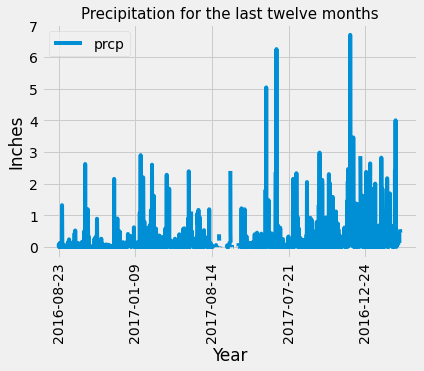

In [17]:
# bar chart of precipitation by date

df.plot(x="date",y="prcp",rot=90)
plt.title("Precipitation for the last twelve months", size=15)
plt.ylabel("Inches")
plt.xlabel("Year")
plt.savefig('prcp_for_twelve_months.png')

In [18]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [19]:
# Design a query to calculate the total number stations in the dataset
Total_number_of_station = session.query(func.count(Station.station)).all()
print(f"Total number of Stations = {Total_number_of_station}")

Total number of Stations = [(9,)]


In [20]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(Measurement.station).\
    all()

[('USC00511918', 1979),
 ('USC00513117', 2709),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00517948', 1372),
 ('USC00518838', 511),
 ('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00519523', 2669)]

In [21]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
Most_active_station = 'USC00519281'

In [22]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
x= session.query(Measurement.tobs).\
     filter(Measurement.station == 'USC00519281').\
     filter(Measurement.date >= '2016-08-23').\
     all()
df2 = pd.DataFrame(x, columns= ["tobs"])

Text(0.5, 0, 'Temperature')

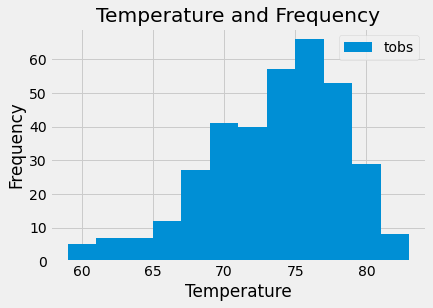

In [23]:
df2.plot.hist(bins=12)
plt.title("Temperature and Frequency")
plt.xlabel('Temperature')

# Close session

In [24]:
# Close Session
session.close()